<a href="https://colab.research.google.com/github/donw385/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module1-Intro-to-Neural-Networks/LS_DS_431_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: what receives input from our dataset
### Hidden Layer: Layers after the input layer are called Hidden Layers. This is because they cannot be accessed except through the input layer.
### Output Layer: The final layer is called the Output Layer. The purpose of the output layer is to output a vector of values that is in a format that is suitable for the type of problem that we're trying to address. 
### Neuron:  neurons or "nodes" are similar in that they receive inputs and pass on their signal to the next layer of nodes if a certain threshold is reached
### Weight: differentiates importance of input values
### Activation Function: In Artificial Neural Networks activation functions decide how much signal to pass onto the next layer. This is why they are sometimes referred to as transfer functions because they determine how much signal is transferred to the next layer.
### Node Map: visual diagram of the architecture or "topology" of our neural network. It's kind of like a flow chart in that it shows the path from inputs to outputs. They are usually color coded and help us understand at a very high level, some of the differences in architecture between kinds of neural networks.
### Perceptron: A perceptron is just a single node or neuron of a neural network with nothing else. It can take any number of inputs and spit out an output.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?



Neural networks are a class of machine learning algorithms used to model complex patterns in datasets using multiple hidden layers and non-linear activation functions. A neural network takes an input, passes it through multiple layers of hidden neurons (mini-functions with unique coefficients that must be learned), and outputs a prediction representing the combined input of all the neurons.

Each neuron’s coefficients (weights) are then adjusted relative to how much they contributed to the total error. Bias terms are additional constants attached to neurons and added to the weighted input before the activation function is applied. This process is repeated iteratively until the network error drops below an acceptable threshold.

Activation functions live inside neural network layers and modify the data they receive before passing it to the next layer. Activation functions give neural networks their power — allowing them to model complex non-linear relationships. By modifying inputs with non-linear functions neural networks can model highly complex relationships between features. 


## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:

import numpy as np
import matplotlib.pyplot as plt

In [0]:
  class PerceptronClassifier():
    """
    Basic perceptron class for binary classification
    """
    def __init__(self, learning_rate=0.1, n_iter=100, tolerance=0.000001):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.tolerance = tolerance
    
    def fit(self, X, y):
        """
        Fit perceptron to a set of training data using gradient descent
        """
        # initialize weights and cost list
        self.weights_ = np.random.uniform(-0.01, 0.01, X.shape[1] + 1)
        self.costs_ = []
        # iterate until fit is adequate
        for i in range(self.n_iter):
            preds = self.predict_proba(X)
            errors = preds - y
            cost = np.sum(errors ** 2)
            self.costs_.append(cost)
            gradient = np.dot(X.T, errors)
            self.weights_[1:] -= self.learning_rate * gradient
            self.weights_[0] -= np.mean(errors)
            
            # break the loop if we are close enough
            if cost < self.tolerance:
                break
            
        return self
    
    def predict_proba(self, X):
        """
        Computes sigmoid output value given X
        """
        return 1. / (1. + np.exp(-(np.dot(X, self.weights_[1:]) + self.weights_[0])))
    
    def predict(self, X):
        """
        Predicts the binary class of X values
        """
        return np.where(self.predict_proba(X)>=0.5, 1, 0)
    
    def show_loss(self):
        """
        Shows loss along epochs
        """
        try:
            iters = range(len(self.costs_))
            fig, ax = plt.subplots()
            ax.plot(iters, self.costs_)
            ax.set_xlabel('Number of Iterations')
            ax.set_ylabel('Training Loss (SSE)')
            ax.set_title('Training Loss')
            plt.show()
        except:
            print ('Please train me first :)')


In [0]:
X = np.array([[0,0],
            [1,0],
            [0,1],
            [1,1]])
y = np.array([1,1,1,0])


In [4]:
X

array([[1, 0, 1],
       [1, 1, 1],
       [0, 0, 1],
       [0, 1, 1]])

In [8]:
ppn = PerceptronClassifier(learning_rate = 1.0, n_iter=100)
ppn.fit(X, y)
ppn.predict(X)

array([1, 1, 1, 0])

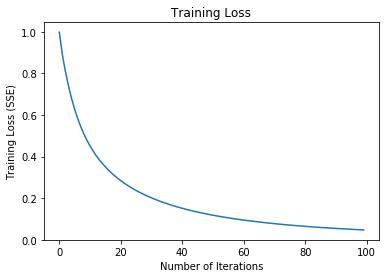

In [11]:
ppn.show_loss()


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df_altered = df.drop(columns='Outcome')

In [0]:

X = df.drop(columns='Outcome').values
y = df.Outcome.values
no_of_inputs = df_altered.shape[1]

In [21]:
df_altered.shape[1]

8

In [22]:
pn = Perceptron(no_of_inputs=no_of_inputs, threshold=10, learning_rate=0.01)
pn.train(X, y)
y_pred = [pn.predict(row) for row in X]
print(f'weights: {pn.weights}')
print(f'Accuracy: {accuracy_score(y, y_pred)}')

weights: [-2.9      8.97     1.14    -2.85    -1.9      1.63     0.635    0.56346
 -1.2    ]
Accuracy: 0.5885416666666666


In [23]:
# Accuracy after 100 iterations
pn = Perceptron(no_of_inputs=no_of_inputs, threshold=100, learning_rate=0.01)
pn.train(X, y)
y_pred = [pn.predict(row) for row in X]
print(f'weights: {pn.weights}')
print(f'Accuracy: {accuracy_score(y, y_pred)}')

weights: [-28.28     15.3       0.97     -3.48     -2.74      1.59     -0.127
   6.89463  -2.25   ]
Accuracy: 0.6536458333333334


In [24]:
# Accuracy after 1000 iterations
pn = Perceptron(no_of_inputs=no_of_inputs, threshold=1000, learning_rate=0.01)
pn.train(X, y)
y_pred = [pn.predict(row) for row in X]
print(f'weights: {pn.weights}')
print(f'Accuracy: {accuracy_score(y, y_pred)}')

weights: [-237.44      13.58       2.61      -3.4       -2.16       2.52
    2.666     46.19301   -1.95   ]
Accuracy: 0.6171875


In [25]:
# Accuracy after 10000 iterations
pn = Perceptron(no_of_inputs=no_of_inputs, threshold=10000, learning_rate=0.01)
pn.train(X, y)
y_pred = [pn.predict(row) for row in X]
print(f'weights: {pn.weights}')
print(f'Accuracy: {accuracy_score(y, y_pred)}')

weights: [-847.85      12.63       5.72      -3.94      -1.88       1.59
    8.516    124.50169    1.21   ]
Accuracy: 0.6822916666666666


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?